In [64]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import pylab

In [2]:
# Read data
life_expectancy = pd.read_csv("./life_expectancy_years.csv")
income = pd.read_csv("./income_per_person.csv")

In [3]:
try:
    income = income.set_index('country')
    life_expectancy = life_expectancy.set_index('country')

except KeyError:
    print(KeyError)

In [4]:
life_expectancy.loc["Canada"]
income

,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,683,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
Angola,700,702,705,709,711,714,718,721,725,727,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
Albania,755,755,755,755,755,756,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,1170,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,...,8860,9050,9250,9440,9650,9860,10.1k,10.3k,10.5k,10.7k
Yemen,993,995,998,1000,1000,1010,1010,1010,1020,1020,...,3750,3830,3910,3990,4080,4170,4260,4350,4440,4540
South Africa,1780,1760,1740,1720,1700,1610,1610,1750,1530,1490,...,16.2k,16.6k,16.9k,17.3k,17.7k,18.1k,18.5k,18.8k,19.3k,19.7k


### Sample countries vs. Time


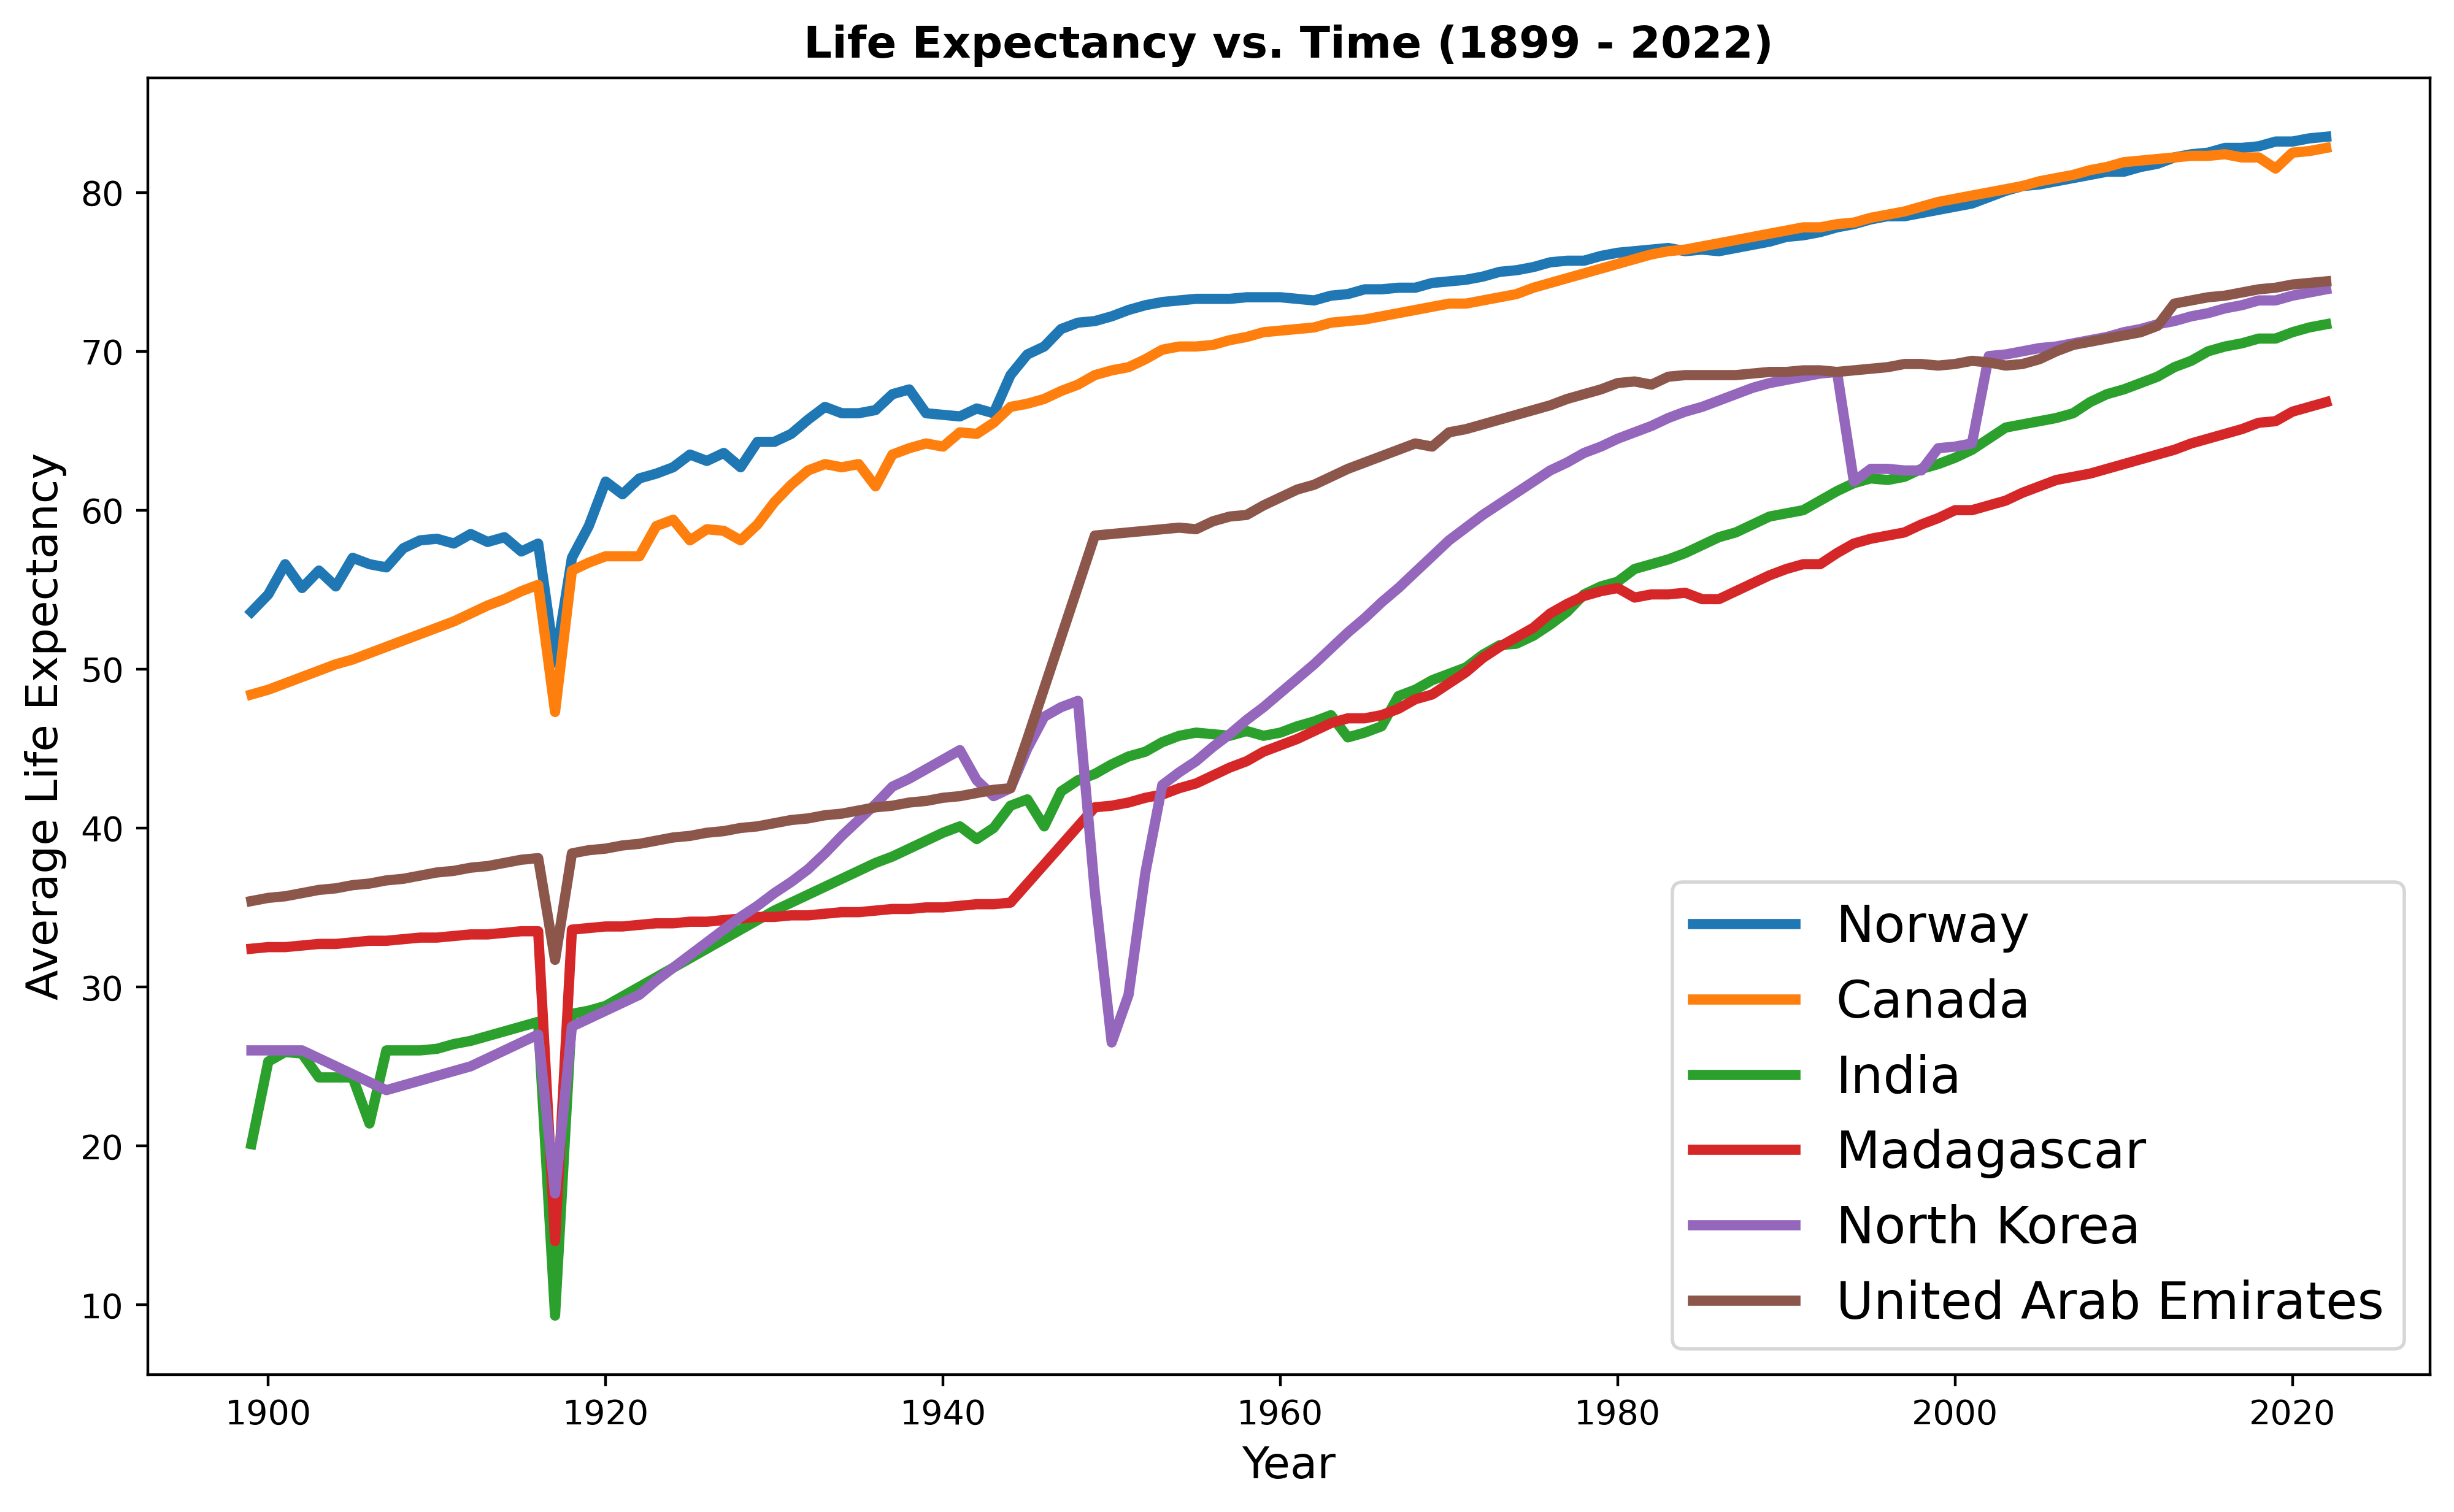

In [11]:
# Initialize plot
plt.figure(figsize=(12, 7), dpi=400)
plt.title(label='Life Expectancy vs. Time (1899 - 2022)', fontdict={'fontsize': 13, 'fontweight': 'bold'})


# countries that Sarina has selected using random sampling
countries = ["Norway", "United Arab Emirates", "Colombia", "Argentina", "Armenia", "Mexico", "North Korea", "Iraq",
"India", "Rwanda", "Kiribati", "Madagascar", "Myanmar", "Pakistan", "Yemen", "Haiti", "Central African Republic"]

# Use testing countries
testing_countries = ["Norway", "Canada", "India", "Madagascar", "North Korea", "United Arab Emirates"]
starting_year = 100 # inclusive -> 1899
ending_year = 224 # not inclusive -> 2022
years = [year + 1799 for year in range(starting_year, ending_year)]


for country in testing_countries:
    average_life = life_expectancy.loc[country]
    average_life_list = [age for age in average_life][starting_year:224]
    plt.plot(years, average_life_list, linewidth=3, label=country)


plt.xlabel('Year', fontdict={'fontsize': 13})
plt.ylabel('Average Life Expectancy', fontdict={'fontsize': 13})
plt.legend(prop={'size': 15})
plt.show()

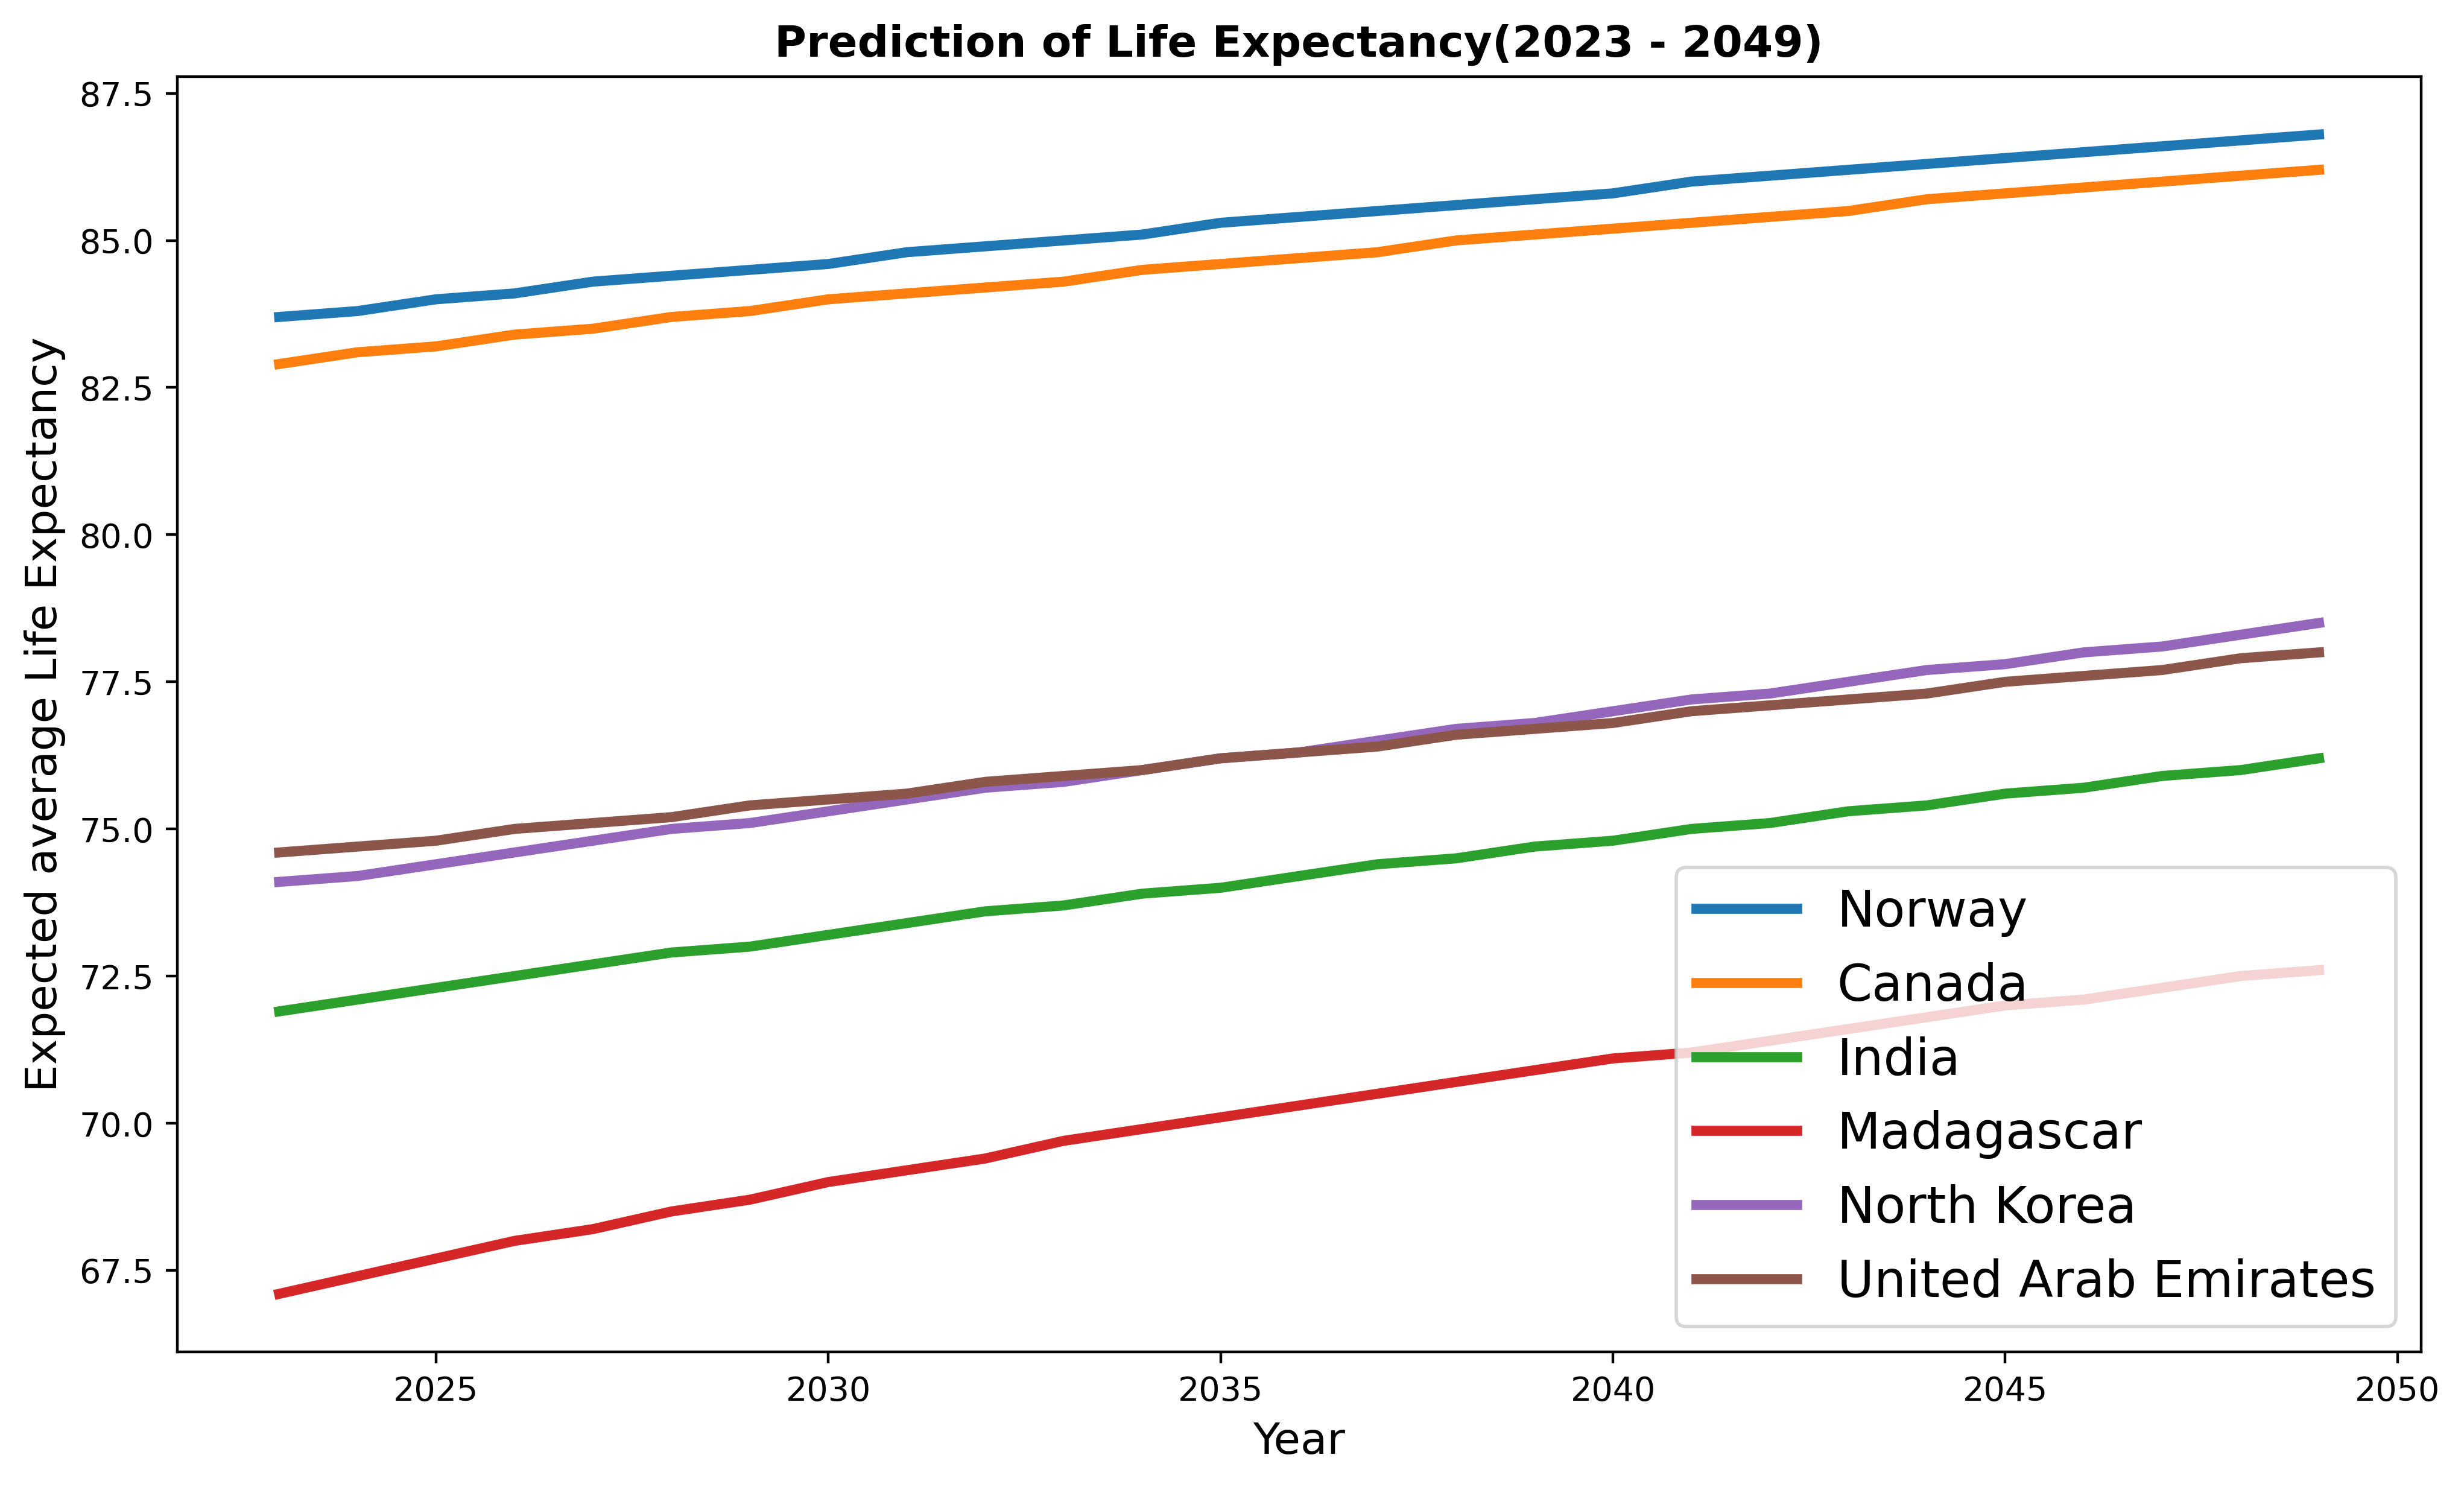

In [17]:
# Initialize plot
plt.figure(figsize=(12, 7), dpi=400)
plt.title(label='Prediction of Life Expectancy(2023 - 2049)', fontdict={'fontsize': 13, 'fontweight': 'bold'})

starting_year = 224 # inclusive -> 2022
ending_year = 251 # not inclusive -> 2049
years = [year + 1799 for year in range(starting_year, ending_year)]

for country in testing_countries:
    average_life = life_expectancy.loc[country]
    average_life_list = [age for age in average_life][starting_year:ending_year]
    plt.plot(years, average_life_list, linewidth=3, label=country)


plt.xlabel('Year', fontdict={'fontsize': 13})
plt.ylabel('Expected average Life Expectancy', fontdict={'fontsize': 13})
plt.legend(prop={'size': 15})
plt.show()

### Box-and-whisker plot (2022)

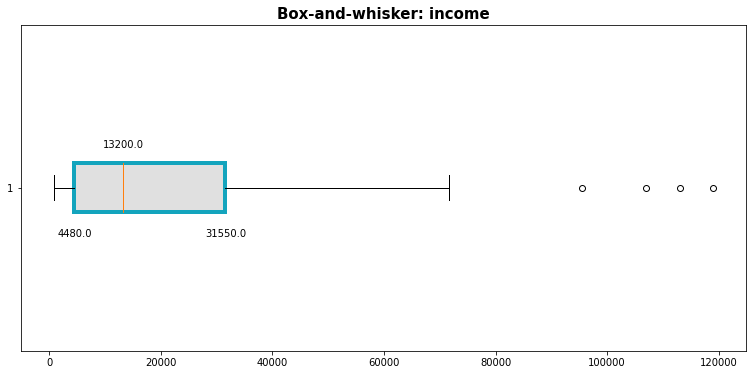

In [97]:
plt.figure(figsize=(13, 6))
plt.title("Box-and-whisker: income", fontdict={'fontsize': 15, 'fontweight': 'bold'})

def value_to_float(x):
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    return float(x)

income_data = [value_to_float(inc) for inc in income["2021"]]

box_and_whisker = plt.boxplot(income_data, vert=False, patch_artist=True)
box_and_whisker['boxes'][0].set(color='#13a4bd', linewidth=4)
box_and_whisker['boxes'][0].set_facecolor('#e0e0e0')

for line in box_and_whisker['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    y += 0.05
    # overlay median value
    pylab.text(x, y, '%.1f' % x, horizontalalignment='center', ) # draw above, centered
    
for box in box_and_whisker['boxes']:
    x, y = box.get_path().vertices[0] # bottom of left line
    y -= 0.05
    pylab.text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
         verticalalignment='top')      # below
    x, y = box.get_path().vertices[3] # bottom of right line
    y -= 0.05
    pylab.text(x,y, '%.1f' % x,
        horizontalalignment='center', # centered
             verticalalignment='top')      # below
    
plt.show()

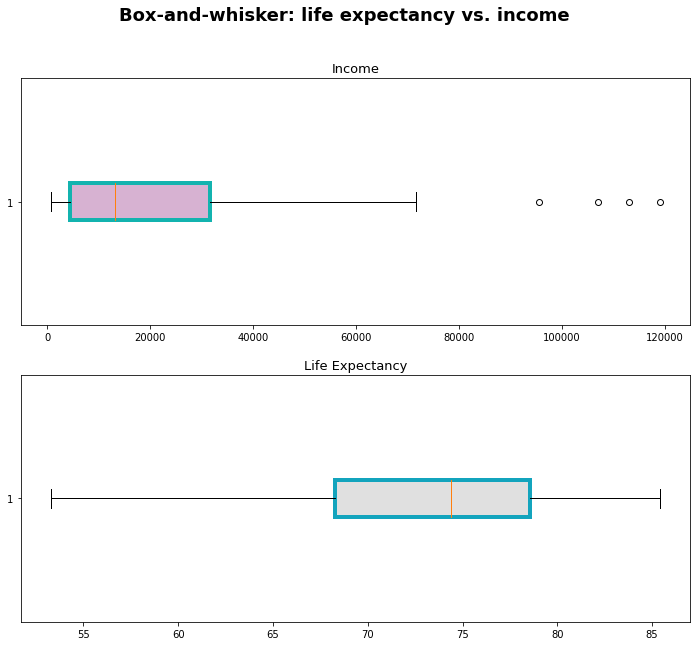

In [167]:
fig, axs = plt.subplots(2, figsize=(12, 10))
fig.suptitle("Box-and-whisker: life expectancy vs. income", fontweight="bold", fontsize=18)
axs[0].set_title("Income", fontsize=13)
axs[1].set_title("Life Expectancy", fontsize=13)

life_expectancy_data = [age for age in life_expectancy["2022"] if not np.isnan(age)]

box_and_whisker1 = axs[0].boxplot(income_data, vert=False, patch_artist=True)
box_and_whisker1['boxes'][0].set(color='#13b3af', linewidth=4)
box_and_whisker1['boxes'][0].set_facecolor('#d7b2d2')

box_and_whisker2 = axs[1].boxplot(life_expectancy_data, vert=False, patch_artist=True)
box_and_whisker2['boxes'][0].set(color='#13a4bd', linewidth=4)
box_and_whisker2['boxes'][0].set_facecolor('#e0e0e0')

    

plt.show()

## Scatter Plot